#            **Ipl match analysis and winner prediction**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
##loading the csv files into dataframes
match_df = pd.read_csv("/content/matches weather and time.csv")
dlvr_df = pd.read_csv("/content/deliveries.csv")
match_df.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,weather,time,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
561,562,2015,Mumbai,10-05-2015,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,normal,0,humid,night,Royal Challengers Bangalore,39,0,AB de Villiers,Wankhede Stadium,JD Cloete,C Shamshuddin,NaN
212,213,2010,Kolkata,07-04-2010,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,hot,day,Kolkata Knight Riders,14,0,SC Ganguly,Eden Gardens,BG Jerling,RE Koertzen,NaN
445,446,2013,Chennai,14-05-2013,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,windy,day,Chennai Super Kings,33,0,MS Dhoni,"MA Chidambaram Stadium, Chepauk",C Shamshuddin,RJ Tucker,NaN
152,153,2009,Port Elizabeth,10-05-2009,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,foggy,night,Mumbai Indians,16,0,JP Duminy,St George's Park,BR Doctrove,BG Jerling,NaN
291,292,2011,Mumbai,14-05-2011,Deccan Chargers,Mumbai Indians,Deccan Chargers,bat,normal,0,humid,night,Deccan Chargers,10,0,A Mishra,Wankhede Stadium,S Ravi,SK Tarapore,NaN
345,346,2012,Mumbai,29-04-2012,Deccan Chargers,Mumbai Indians,Mumbai Indians,field,normal,0,foggy,night,Mumbai Indians,0,5,DW Steyn,Wankhede Stadium,AK Chaudhary,BNJ Oxenford,NaN
321,322,2012,Kolkata,13-04-2012,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,rainy,day,Kolkata Knight Riders,0,5,Shakib Al Hasan,Eden Gardens,Asad Rauf,S Asnani,NaN
257,258,2011,Kolkata,22-04-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,humid,day,Royal Challengers Bangalore,0,9,CH Gayle,Eden Gardens,SS Hazare,RB Tiffin,NaN
515,516,2014,Mumbai,30-05-2014,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,hot,night,Kings XI Punjab,24,0,V Sehwag,Wankhede Stadium,HDPK Dharmasena,RJ Tucker,NaN
46,47,2017,Hyderabad,08-05-2017,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,humid,day,Sunrisers Hyderabad,0,7,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,M Erasmus,NaN


In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  weather          636 non-null    object 
 11  time             636 non-null    object 
 12  winner           633 non-null    object 
 13  win_by_runs      636 non-null    int64  
 14  win_by_wickets   636 non-null    int64  
 15  player_of_match  633 non-null    object 
 16  venue            636 non-null    object 
 17  umpire1         

In [ ]:
dlvr_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

# Exploratory Data Analysis

**Looking at all the teams in the teams and winners' column**

In [ ]:
match_df['winner'].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [ ]:
match_df['team1'].value_counts()

Mumbai Indians                 82
Kings XI Punjab                77
Chennai Super Kings            77
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Delhi Daredevils               63
Rajasthan Royals               54
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team1, dtype: int64

In [ ]:
match_df[match_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,weather,time,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,foggy,night,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,hot,night,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,hot,night,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [ ]:
##replacing null results with draw
match_df['winner'].fillna('Draw', inplace=True)
match_df[match_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,weather,time,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


# Encoding Team Names

In [ ]:
team_encodings = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,    
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiants': 11,
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
    'Draw': 15
}
team_encode_dict = {'team1': team_encodings,
                    'team2': team_encodings,
                    'toss_winner': team_encodings,
                    'weather': team_encodings,
                    'time': team_encodings,
                    'winner': team_encodings
                   }

match_df.replace(team_encode_dict, inplace=True)
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,weather,time,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,10,3,3,field,normal,0,hot,night,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,1,11,11,field,normal,0,humid,day,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,8,2,2,field,normal,0,hot,night,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,11,9,9,field,normal,0,windy,night,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,3,7,3,bat,normal,0,foggy,day,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    int64  
 5   team2            636 non-null    int64  
 6   toss_winner      636 non-null    int64  
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  weather          636 non-null    object 
 11  time             636 non-null    object 
 12  winner           636 non-null    int64  
 13  win_by_runs      636 non-null    int64  
 14  win_by_wickets   636 non-null    int64  
 15  player_of_match  633 non-null    object 
 16  venue            636 non-null    object 
 17  umpire1         

# Exploring City Column

In [ ]:
match_df['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Port Elizabeth     7
Cuttack            7
Ranchi             7
Cape Town          7
Abu Dhabi          7
Sharjah            6
Raipur             6
Indore             5
Kochi              5
Kanpur             4
East London        3
Nagpur             3
Kimberley          3
Bloemfontein       2
Name: city, dtype: int64

In [ ]:
## checking for missing values
match_df[match_df['city'].isnull() == True ]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,weather,time,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,19-04-2014,1,3,3,field,normal,0,humid,night,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,19-04-2014,2,7,2,bat,normal,0,foggy,day,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,23-04-2014,5,6,6,field,normal,0,foggy,day,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,25-04-2014,10,7,10,bat,normal,0,windy,day,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,25-04-2014,1,5,1,bat,normal,0,hot,night,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,28-04-2014,3,9,9,field,normal,0,foggy,day,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,30-04-2014,10,1,1,field,normal,0,windy,night,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


**All the missing values in the city column are for the matches that were played at Dubai International Stadium.**

In [ ]:
match_df['city'].fillna('Dubai',inplace=True)
match_df.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,5.540881,5.511006,5.371069,0.025157,5.314465,13.682390,3.372642,NaN
std,183.741666,2.773026,3.329169,3.341677,3.293140,0.156726,3.301898,23.908877,3.420338,NaN
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,9.000000,8.000000,7.250000,0.000000,8.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,13.000000,13.000000,13.000000,1.000000,15.000000,146.000000,10.000000,NaN


# Dropping all the redundant columns

In [ ]:
match_df = match_df[['id', 'team1','team2','city','toss_decision','weather','time','toss_winner','venue','winner']]
match_df.head()

,id,team1,team2,city,toss_decision,weather,time,toss_winner,venue,winner
0,1,10,3,Hyderabad,field,hot,night,3,"Rajiv Gandhi International Stadium, Uppal",10
1,2,1,11,Pune,field,humid,day,11,Maharashtra Cricket Association Stadium,11
2,3,8,2,Rajkot,field,hot,night,2,Saurashtra Cricket Association Stadium,2
3,4,11,9,Indore,field,windy,night,9,Holkar Cricket Stadium,9
4,5,3,7,Bangalore,bat,foggy,day,3,M Chinnaswamy Stadium,3


In [ ]:
match_df.describe()

,id,team1,team2,toss_winner,winner
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,5.540881,5.511006,5.371069,5.314465
std,183.741666,3.329169,3.341677,3.293140,3.301898
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,159.750000,3.000000,3.000000,2.000000,2.000000
50%,318.500000,5.000000,5.000000,5.000000,5.000000
75%,477.250000,9.000000,8.000000,7.250000,8.000000
max,636.000000,13.000000,13.000000,13.000000,15.000000


# Toss Wins and Match Wins by each Team

In [ ]:
##looking at number of toss wins and match wins
toss_wins = match_df['winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)

for idx, val in toss_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx-1]} -> {toss_wins[idx]}")

Mumbai Indians -> 92
Chennai Super Kings -> 79
Kolkata Knight Riders -> 77
Royal Challengers Bangalore -> 73
Kings XI Punjab -> 70
Rajasthan Royals -> 63
Delhi Daredevils -> 62
Sunrisers Hyderabad -> 42
Deccan Chargers -> 29
Rising Pune Supergiants -> 15
Gujarat Lions -> 13
Kochi Tuskers Kerala -> 12
Rising Pune Supergiant -> 6
Delhi Capitals -> 3


#    Plotting Wins by each team on a Histogram

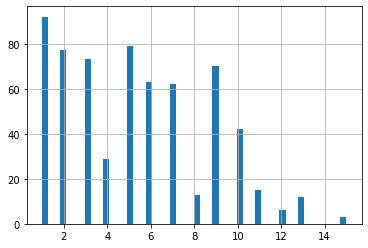

In [ ]:
match_df['winner'].hist(bins=50)

In [ ]:
match_df['winner'].value_counts()

1     92
5     79
2     77
3     73
9     70
6     63
7     62
10    42
4     29
11    15
8     13
13    12
12     6
15     3
Name: winner, dtype: int64

Text(0.5, 1.0, 'Match winners')

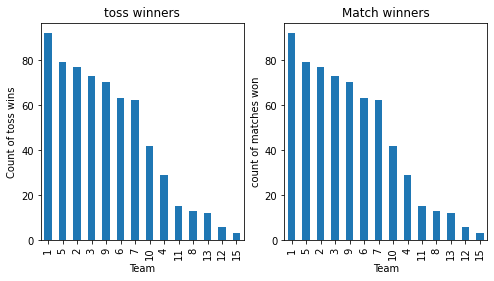

In [ ]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

Text(0.5, 1.0, 'Match winners')

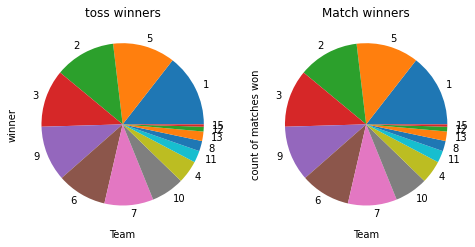

In [ ]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
toss_wins.plot(kind='pie')

ax2 = fig.add_subplot(122)
match_wins.plot(kind = 'pie')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

Text(0.5, 1.0, 'Match winners')

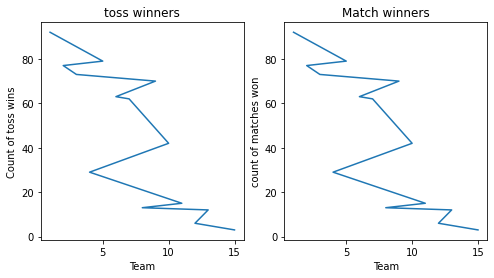

In [ ]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
toss_wins.plot(kind='line')

ax2 = fig.add_subplot(122)
match_wins.plot(kind = 'line')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [ ]:
match_df.isnull().sum()

id               0
team1            0
team2            0
city             0
toss_decision    0
weather          0
time             0
toss_winner      0
venue            0
winner           0
dtype: int64

# Data Preparation
 

**Encoding all the remaining features**


1.   city
2.   toss_decision
3.   weather
4.   time
5.   venue



In [ ]:
##using the label encoder
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city', 'toss_decision','weather','time', 'venue']
encoder = LabelEncoder()
for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)

match_df

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bloemfontein' 'Cape Town'
 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi' 'Dharamsala' 'Dubai'
 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur' 'Johannesburg'
 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mumbai' 'Nagpur' 'Port Elizabeth'
 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah' 'Visakhapatnam']
['bat' 'field']
['foggy' 'hot' 'humid' 'rainy' 'windy']
['day' 'night']
['Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Green Park' 'Himachal Pradesh Cricket Association Stadium'
 'Holkar Cricket Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New Wanderers Stadium' 'Newlands' 'OUTsurance Oval'
 'Punjab Cricket Association IS Bindra

,id,team1,team2,city,toss_decision,weather,time,toss_winner,venue,winner
0,1,10,3,14,1,1,1,3,23,10
1,2,1,11,25,1,2,0,11,16,11
2,3,8,2,27,1,1,1,2,25,2
3,4,11,9,15,1,4,1,9,11,9
4,5,3,7,2,0,0,0,3,14,3
...,...,...,...,...,...,...,...,...,...,...
631,632,7,3,26,1,2,1,3,27,3
632,633,8,3,2,1,2,0,3,14,3
633,634,10,2,9,1,1,1,2,8,10
634,635,8,10,9,1,0,1,10,8,10


# Machine Learning

In [ ]:
##splitting the data for training and testing

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(match_df, test_size=0.2, random_state=42)
print(train_df.shape)
print(test_df.shape)

(508, 10)
(128, 10)


In [ ]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


def print_model_scores(model, data, predictors, target):
    '''
    A generic function to generate the performance report of the
    model in question on the data passed to it using cross-validation
    
    Args:
        model: ML Model to be checked
        data: data on which the model needs to pe trained
        predictors: independent feature variable
        target: target variable
    '''
    model.fit(data[predictors], data[target])
    predictions = model.predict(data[predictors])
    accuracy = accuracy_score(predictions,data[target])
    print('Accuracy : %s' % '{0:.2%}'.format(accuracy))
    scores = cross_val_score(model, data[predictors], data[target], scoring="neg_mean_squared_error", cv=5)
    print('Cross-Validation Score :{}'.format(np.sqrt(-scores)))
    print(f"Average RMSE: {np.sqrt(-scores).mean()}")

# Logistic Regression

In [ ]:
target_var=['winner']
predictor_var = ['team1','team2','venue', 'toss_winner', 'city', 'toss_decision','weather','time']
model = LogisticRegression()
print_model_scores(model, train_df, predictor_var, target_var)

Accuracy : 31.69%
Cross-Validation Score :[2.89184113 3.64207439 3.33431358 3.79551585 3.59179483]
Average RMSE: 3.4511079566695484


# Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=100)
target_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision','weather','time']
print_model_scores(model, match_df,predictor_var, target_var)

Accuracy : 97.33%
Cross-Validation Score :[3.03366527 3.52493927 3.30711474 3.69187232 3.38128243]
Average RMSE: 3.3877748066188764


# Sample Prediction

In [ ]:
team1='Kolkata Knight Riders'
team2='Sunrisers Hyderabad'
toss_winner='Sunrisers Hyderabad'
inp = [team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],'14',team_encode_dict['toss_winner'][toss_winner],'2','1']
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(f"The winner would be: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(output)]}")

[['2' '10' '14' '10' '2' '1']]


ValueError: ignored

# Feature Importance

In [ ]:
pd.Series(index= predictor_var, data=model.feature_importances_)

team1            0.182179
team2            0.199618
venue            0.144516
toss_winner      0.147996
city             0.130731
toss_decision    0.028652
weather          0.114840
time             0.051468
dtype: float64

#Running Model on Unseen data

In [ ]:
print_model_scores(model, test_df, predictor_var, target_var)

Accuracy : 99.22%
Cross-Validation Score :[3.70550526 3.07596139 1.89127552 2.39165215 2.25388553]
Average RMSE: 2.663655969285765


In [ ]:
match_df[match_df['winner'] == match_df['toss_winner']]

,id,team1,team2,city,toss_decision,weather,time,toss_winner,venue,winner
1,2,1,11,25,1,2,0,11,16,11
2,3,8,2,27,1,1,1,2,25,2
3,4,11,9,15,1,4,1,9,11,9
4,5,3,7,2,0,0,0,3,14,3
5,6,8,10,14,1,1,1,10,23,10
...,...,...,...,...,...,...,...,...,...,...
629,630,1,8,18,1,0,0,8,9,8
631,632,7,3,26,1,2,1,3,27,3
632,633,8,3,2,1,2,0,3,14,3
634,635,8,10,9,1,0,1,10,8,10


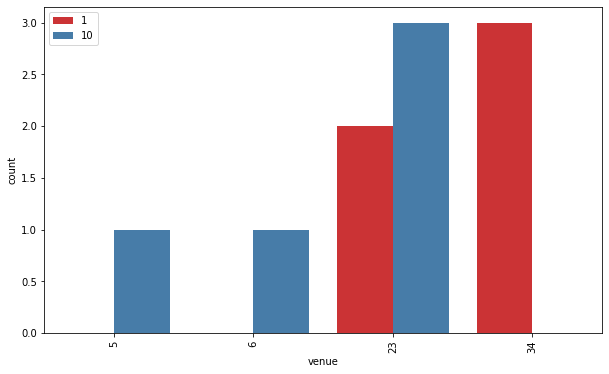

In [ ]:
import seaborn as sns
team1=team_encodings['Mumbai Indians']
team2=team_encodings['Sunrisers Hyderabad']
mtemp=match_df[((match_df['team1']==team1)|(match_df['team2']==team1))&((match_df['team1']==team2)|(match_df['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp, palette='Set1')
plt.xticks(rotation='vertical')
leg = plt.legend( loc = 'upper left')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# Taking it a step further: Adding Variables

In [ ]:
batsman_grp = dlvr_df.groupby(['match_id', 'batting_team'])
batsmen = batsman_grp['batsman_runs'].sum().reset_index()
batsmen

,match_id,batting_team,batsman_runs
0,1,Royal Challengers Bangalore,166
1,1,Sunrisers Hyderabad,200
2,2,Mumbai Indians,176
3,2,Rising Pune Supergiant,183
4,3,Gujarat Lions,179
...,...,...,...
1265,634,Sunrisers Hyderabad,156
1266,635,Gujarat Lions,157
1267,635,Sunrisers Hyderabad,161
1268,636,Royal Challengers Bangalore,191


In [ ]:
match = pd.read_csv("/content/matches weather and time.csv")
match = match[match['winner'].isnull() != True]
teams = match.groupby(['id', 'team1', 'team2'])['winner'].sum().reset_index()
teams['id']

0        1
1        2
2        3
3        4
4        5
      ... 
628    632
629    633
630    634
631    635
632    636
Name: id, Length: 633, dtype: int64

In [ ]:
teams

,id,team1,team2,winner
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...,...
628,632,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
629,633,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore
630,634,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad
631,635,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad


In [ ]:
# teams = teams[teams['id']!= [301]]
# batsmen = batsmen[batsmen['match_id'] != [301, 545]]
append_dict = {'match_id': list(teams['id']),
              'team1': list(teams['team2']),
              'team2': list(teams['team1']),
              'team1_score': [],
              'team2_score': [],
               'winner': list(teams['winner'])
              }

for match_id, team in zip(list(teams['id']), list(teams['team1'])):
    append_dict['team1_score'].append(int(batsmen.query('match_id == @match_id and batting_team == @team')['batsman_runs']))

for match_id, team in zip(list(teams['id']), list(teams['team2'])):
    append_dict['team2_score'].append(int(batsmen.query('match_id == @match_id and batting_team == @team')['batsman_runs']))
  
df = pd.DataFrame(append_dict)
   

In [ ]:
df

,match_id,team1,team2,team1_score,team2_score,winner
0,1,Royal Challengers Bangalore,Sunrisers Hyderabad,200,166,Sunrisers Hyderabad
1,2,Rising Pune Supergiant,Mumbai Indians,176,183,Rising Pune Supergiant
2,3,Kolkata Knight Riders,Gujarat Lions,179,169,Kolkata Knight Riders
3,4,Kings XI Punjab,Rising Pune Supergiant,157,154,Kings XI Punjab
4,5,Delhi Daredevils,Royal Challengers Bangalore,151,137,Royal Challengers Bangalore
...,...,...,...,...,...,...
628,632,Royal Challengers Bangalore,Delhi Daredevils,132,129,Royal Challengers Bangalore
629,633,Royal Challengers Bangalore,Gujarat Lions,147,143,Royal Challengers Bangalore
630,634,Kolkata Knight Riders,Sunrisers Hyderabad,156,131,Sunrisers Hyderabad
631,635,Sunrisers Hyderabad,Gujarat Lions,157,161,Sunrisers Hyderabad


In [ ]:
team_encodings = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,    
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiants': 11,
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
    'Draw': 15
}

team_encode_dict = {'team1': team_encodings,
                    'team2': team_encodings,
                    'toss_winner': team_encodings,
                    'winner': team_encodings
                   }

df.replace(team_encode_dict, inplace=True)
df.head()

,match_id,team1,team2,team1_score,team2_score,winner
0,1,3,10,200,166,10
1,2,11,1,176,183,11
2,3,2,8,179,169,2
3,4,9,11,157,154,9
4,5,7,3,151,137,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   match_id     633 non-null    int64
 1   team1        633 non-null    int64
 2   team2        633 non-null    int64
 3   team1_score  633 non-null    int64
 4   team2_score  633 non-null    int64
 5   winner       633 non-null    int64
dtypes: int64(6)
memory usage: 29.8 KB


In [ ]:
cols_to_use = match_df.columns.difference(df.columns)
cols_to_use

Index(['city', 'id', 'time', 'toss_decision', 'toss_winner', 'venue',
       'weather'],
      dtype='object')

In [ ]:
merged_df = pd.merge(df, match_df[cols_to_use], left_on='match_id', right_on='id', how='outer')
merged_df = merged_df.dropna()
merged_df = merged_df.drop('id', axis=1)

In [ ]:
merged_df

,match_id,team1,team2,team1_score,team2_score,winner,city,time,toss_decision,toss_winner,venue,weather
0,1.0,3.0,10.0,200.0,166.0,10.0,14,1,1,3,23,1
1,2.0,11.0,1.0,176.0,183.0,11.0,25,0,1,11,16,2
2,3.0,2.0,8.0,179.0,169.0,2.0,27,1,1,2,25,1
3,4.0,9.0,11.0,157.0,154.0,9.0,15,1,1,9,11,4
4,5.0,7.0,3.0,151.0,137.0,3.0,2,0,0,3,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...
628,632.0,3.0,7.0,132.0,129.0,3.0,26,1,1,3,27,2
629,633.0,3.0,8.0,147.0,143.0,3.0,2,0,1,3,14,2
630,634.0,2.0,10.0,156.0,131.0,10.0,9,1,1,2,8,1
631,635.0,10.0,8.0,157.0,161.0,10.0,9,1,1,10,8,0


In [ ]:
def categorize(val):
    if val < 50:
        return 1
    elif val >= 50 and val < 100:
        return 2
    elif val >= 100 and val < 150:
        return 3
    elif val >= 150 and val < 200:
        return 4
    else:
        return 5

cols = ['team1_score', 'team2_score']
for col in cols:
    merged_df[col] = merged_df[col].apply(categorize)
    
merged_df

,match_id,team1,team2,team1_score,team2_score,winner,city,time,toss_decision,toss_winner,venue,weather
0,1.0,3.0,10.0,5,4,10.0,14,1,1,3,23,1
1,2.0,11.0,1.0,4,4,11.0,25,0,1,11,16,2
2,3.0,2.0,8.0,4,4,2.0,27,1,1,2,25,1
3,4.0,9.0,11.0,4,4,9.0,15,1,1,9,11,4
4,5.0,7.0,3.0,4,3,3.0,2,0,0,3,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...
628,632.0,3.0,7.0,3,3,3.0,26,1,1,3,27,2
629,633.0,3.0,8.0,3,3,3.0,2,0,1,3,14,2
630,634.0,2.0,10.0,4,3,10.0,9,1,1,2,8,1
631,635.0,10.0,8.0,4,4,10.0,9,1,1,10,8,0


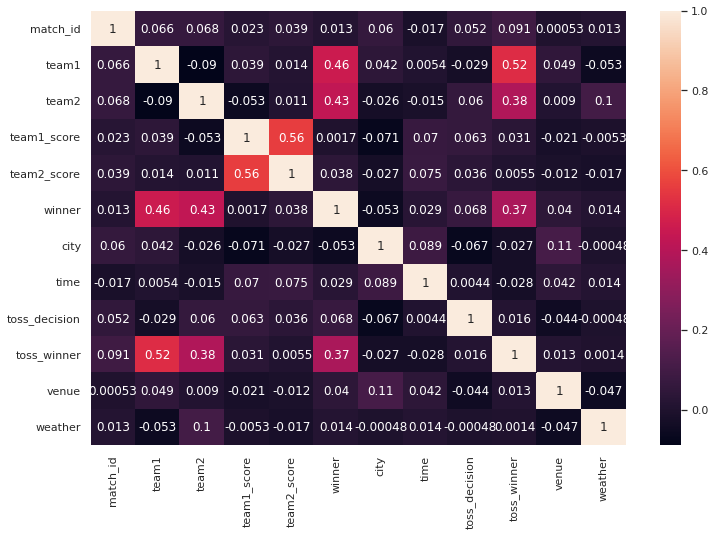

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
ax = sns.heatmap(merged_df.corr(), annot=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dlvr_df = pd.read_csv("/content/deliveries.csv")

dlvr_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [ ]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [ ]:
##checking for missing values

dlvr_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [ ]:
batsmen = dlvr_df.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name="runs")

In [ ]:
top_batsmen = batsmen.sort_values(by='runs', ascending=False)[:10]
top_batsmen

,batsman,runs
374,SK Raina,4548
431,V Kohli,4423
323,RG Sharma,4207
137,G Gambhir,4132
103,DA Warner,4014
340,RV Uthappa,3778
85,CH Gayle,3651
347,S Dhawan,3561
259,MS Dhoni,3560
22,AB de Villiers,3486


Text(0.5, 1.0, 'Top 10 Batsmen in IPL')

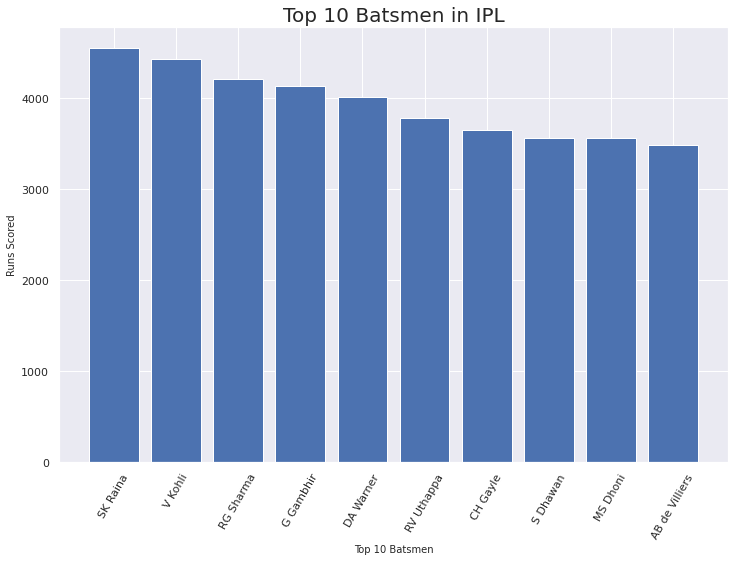

In [ ]:
##plotting the batsmen and the runs scored by them
plt.bar(top_batsmen['batsman'], top_batsmen['runs'])
plt.xticks(rotation=60)
plt.xlabel('Top 10 Batsmen',size=10)
plt.ylabel('Runs Scored',size=10)
plt.title('Top 10 Batsmen in IPL',size=20)

In [ ]:
innings = dlvr_df.groupby(['match_id', 'batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='inning_runs')
best_ings = innings.sort_values(by='inning_runs', ascending=False)[:10]
best_ings

,match_id,batsman,inning_runs
6200,411,CH Gayle,175
900,60,BB McCullum,158
8426,562,AB de Villiers,133
9257,620,AB de Villiers,129
5585,372,CH Gayle,128
3135,206,M Vijay,127
529,36,DA Warner,126
7752,516,V Sehwag,122
3686,243,PC Valthaty,120
4223,279,V Sehwag,119


# Bowlers' Performances

In [ ]:
bowlers = dlvr_df[dlvr_df['dismissal_kind'] != 'run out']
bowlers = dlvr_df.groupby('bowler').apply(lambda x: x['dismissal_kind'].dropna().reset_index(name='wickets'))
bowlers

index wickets
bowler                            
A Ashish Reddy 0     80497  bowled
               1     80502  caught
               2     81750  caught
               3     82253  caught
               4     83084  caught
...                    ...     ...
Z Khan         114  142480  caught
               115  143476  bowled
               116  144752  caught
               117  147288  caught
               118  149389  caught

[7438 rows x 2 columns]

In [ ]:
bowlers_df = bowlers.groupby('bowler').count().reset_index()
top_bowlers = bowlers_df.sort_values(by='wickets', ascending=False)[:10]

In [ ]:
top_bowlers

,bowler,index,wickets
259,SL Malinga,170,170
5,A Mishra,142,142
80,DJ Bravo,137,137
107,Harbhajan Singh,136,136
204,PP Chawla,133,133
219,R Vinay Kumar,125,125
7,A Nehra,121,121
313,Z Khan,119,119
46,B Kumar,117,117
209,R Ashwin,110,110


In [ ]:
bowling_ings = dlvr_df.groupby(['match_id', 'bowler']).apply(lambda x: x['dismissal_kind'].dropna()).reset_index(name='wickets')
ings_wkts_count = bowling_ings.groupby(['match_id', 'bowler']).count().reset_index()
top_bowlers = ings_wkts_count.sort_values(by='wickets', ascending=False)[:10]
top_bowlers

,match_id,bowler,level_2,wickets
3121,440,DJG Sammy,6,6
4344,616,A Zampa,6,6
4294,608,AD Russell,6,6
609,83,Sohail Tanvir,6,6
316,43,JD Unadkat,5,5
89,13,AJ Tye,5,5
139,19,B Kumar,5,5
859,121,RP Singh,5,5
854,120,DL Vettori,5,5
2707,382,SP Narine,5,5


In [ ]:
bowling_ings_runs = dlvr_df.groupby(['match_id', 'bowler']).apply(lambda x: x['total_runs'].sum()).reset_index(name='runs_conceded')
top_performances = pd.merge(top_bowlers, bowling_ings_runs, left_on=['match_id', 'bowler'], right_on=['match_id', 'bowler'])
top_performances['runs_per_wicket'] = top_performances['runs_conceded'] / top_performances['wickets']
top_performances

,match_id,bowler,level_2,wickets,runs_conceded,runs_per_wicket
0,440,DJG Sammy,6,6,23,3.833333
1,616,A Zampa,6,6,19,3.166667
2,608,AD Russell,6,6,25,4.166667
3,83,Sohail Tanvir,6,6,15,2.500000
4,43,JD Unadkat,5,5,30,6.000000
5,13,AJ Tye,5,5,18,3.600000
6,19,B Kumar,5,5,20,4.000000
7,121,RP Singh,5,5,22,4.400000
8,120,DL Vettori,5,5,15,3.000000
9,382,SP Narine,5,5,13,2.600000


In [ ]:
match_bowling_grp = dlvr_df.groupby(['match_id', 'inning', 'bowling_team', 'bowler', 'over'])
bowler_runs = match_bowling_grp['total_runs', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs'].sum().reset_index()

bowler_runs['extras'] = bowler_runs['wide_runs'] + bowler_runs['noball_runs']
bowler_runs['runs'] = bowler_runs['total_runs'] - bowler_runs['bye_runs'] + bowler_runs['legbye_runs']


bowler_runs = bowler_runs.drop(['bye_runs', 'legbye_runs', 'total_runs'], axis=1)

In [ ]:
bowler_runs

,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,extras,runs
0,1,1,Royal Challengers Bangalore,A Choudhary,2,0,1,1,16
1,1,1,Royal Challengers Bangalore,A Choudhary,10,0,0,0,4
2,1,1,Royal Challengers Bangalore,A Choudhary,13,1,0,1,18
3,1,1,Royal Challengers Bangalore,A Choudhary,18,2,0,2,17
4,1,1,Royal Challengers Bangalore,S Aravind,5,0,0,0,9
...,...,...,...,...,...,...,...,...,...
24403,636,2,Sunrisers Hyderabad,MC Henriques,15,0,0,0,9
24404,636,2,Sunrisers Hyderabad,Mustafizur Rahman,6,0,0,0,4
24405,636,2,Sunrisers Hyderabad,Mustafizur Rahman,10,0,0,0,12
24406,636,2,Sunrisers Hyderabad,Mustafizur Rahman,17,0,0,0,10


In [ ]:
bowler_runs.groupby(['match_id', 'bowler', 'bowling_team'])['runs'].sum().reset_index()

,match_id,bowler,bowling_team,runs
0,1,A Choudhary,Royal Challengers Bangalore,55
1,1,A Nehra,Sunrisers Hyderabad,42
2,1,B Kumar,Sunrisers Hyderabad,29
3,1,BCJ Cutting,Sunrisers Hyderabad,35
4,1,Bipul Sharma,Sunrisers Hyderabad,4
...,...,...,...,...
7566,636,MC Henriques,Sunrisers Hyderabad,40
7567,636,Mustafizur Rahman,Sunrisers Hyderabad,39
7568,636,S Aravind,Royal Challengers Bangalore,30
7569,636,SR Watson,Royal Challengers Bangalore,61


In [ ]:
bowler_runs.groupby(['match_id', 'bowler', 'bowling_team'])['over'].count().reset_index()

,match_id,bowler,bowling_team,over
0,1,A Choudhary,Royal Challengers Bangalore,4
1,1,A Nehra,Sunrisers Hyderabad,4
2,1,B Kumar,Sunrisers Hyderabad,4
3,1,BCJ Cutting,Sunrisers Hyderabad,4
4,1,Bipul Sharma,Sunrisers Hyderabad,1
...,...,...,...,...
7566,636,MC Henriques,Sunrisers Hyderabad,3
7567,636,Mustafizur Rahman,Sunrisers Hyderabad,4
7568,636,S Aravind,Royal Challengers Bangalore,4
7569,636,SR Watson,Royal Challengers Bangalore,4


In [ ]:
bowler_runs

,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,extras,runs
0,1,1,Royal Challengers Bangalore,A Choudhary,2,0,1,1,16
1,1,1,Royal Challengers Bangalore,A Choudhary,10,0,0,0,4
2,1,1,Royal Challengers Bangalore,A Choudhary,13,1,0,1,18
3,1,1,Royal Challengers Bangalore,A Choudhary,18,2,0,2,17
4,1,1,Royal Challengers Bangalore,S Aravind,5,0,0,0,9
...,...,...,...,...,...,...,...,...,...
24403,636,2,Sunrisers Hyderabad,MC Henriques,15,0,0,0,9
24404,636,2,Sunrisers Hyderabad,Mustafizur Rahman,6,0,0,0,4
24405,636,2,Sunrisers Hyderabad,Mustafizur Rahman,10,0,0,0,12
24406,636,2,Sunrisers Hyderabad,Mustafizur Rahman,17,0,0,0,10


# Predicting the Score of a Team

In [ ]:
batsman_grp = dlvr_df.groupby(['match_id', 'inning', 'batting_team', 'batsman'])
batsmen = batsman_grp['batsman_runs'].sum().reset_index()
batsmen

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16
1,1,1,Sunrisers Hyderabad,DA Warner,14
2,1,1,Sunrisers Hyderabad,DJ Hooda,16
3,1,1,Sunrisers Hyderabad,MC Henriques,52
4,1,1,Sunrisers Hyderabad,S Dhawan,40
...,...,...,...,...,...
9542,636,2,Royal Challengers Bangalore,KL Rahul,11
9543,636,2,Royal Challengers Bangalore,SR Watson,11
9544,636,2,Royal Challengers Bangalore,STR Binny,9
9545,636,2,Royal Challengers Bangalore,Sachin Baby,18


In [ ]:
## ignoring the wide balls.
balls_faced = dlvr_df[dlvr_df["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"],
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0
...,...,...,...,...,...,...
9542,636,2,Royal Challengers Bangalore,KL Rahul,11,9.0
9543,636,2,Royal Challengers Bangalore,SR Watson,11,9.0
9544,636,2,Royal Challengers Bangalore,STR Binny,9,7.0
9545,636,2,Royal Challengers Bangalore,Sachin Baby,18,10.0


In [ ]:
##fours and sixes
fours = dlvr_df[ dlvr_df["batsman_runs"] == 4]
sixes = dlvr_df[ dlvr_df["batsman_runs"] == 6]

fours_by_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_by_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

In [ ]:
fours_by_batsman

,match_id,inning,batsman,batsman_runs
0,1,1,DA Warner,2
1,1,1,MC Henriques,3
2,1,1,S Dhawan,5
3,1,1,Yuvraj Singh,7
4,1,2,CH Gayle,2
...,...,...,...,...
5790,636,2,CH Gayle,4
5791,636,2,Iqbal Abdulla,1
5792,636,2,KL Rahul,1
5793,636,2,Sachin Baby,1


In [ ]:
fours_by_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_by_batsman.columns = ["match_id", "inning", "batsman", "6s"]

In [ ]:
batsmen = batsmen.merge(fours_by_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_by_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

In [ ]:
batsmen

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,NaN,2.0,266.67
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0,175.00
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0,NaN,1.0,133.33
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0,3.0,2.0,140.54
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0,5.0,NaN,129.03
...,...,...,...,...,...,...,...,...,...
9542,636,2,Royal Challengers Bangalore,KL Rahul,11,9.0,1.0,NaN,122.22
9543,636,2,Royal Challengers Bangalore,SR Watson,11,9.0,NaN,1.0,122.22
9544,636,2,Royal Challengers Bangalore,STR Binny,9,7.0,NaN,1.0,128.57
9545,636,2,Royal Challengers Bangalore,Sachin Baby,18,10.0,1.0,1.0,180.00


In [ ]:
na_cols = ["batsman_runs", "4s", "6s", "SR"]
for col in na_cols:
    batsmen[col] = batsmen[col].fillna(0)

In [ ]:
batsmen

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,0.0,2.0,266.67
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0,175.00
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0,0.0,1.0,133.33
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0,3.0,2.0,140.54
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0,5.0,0.0,129.03
...,...,...,...,...,...,...,...,...,...
9542,636,2,Royal Challengers Bangalore,KL Rahul,11,9.0,1.0,0.0,122.22
9543,636,2,Royal Challengers Bangalore,SR Watson,11,9.0,0.0,1.0,122.22
9544,636,2,Royal Challengers Bangalore,STR Binny,9,7.0,0.0,1.0,128.57
9545,636,2,Royal Challengers Bangalore,Sachin Baby,18,10.0,1.0,1.0,180.00


In [ ]:
team_score = batsmen[batsmen['batting_team'] == "Mumbai Indians"].reset_index()
team_score

,index,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,17,2,1,Mumbai Indians,AT Rayudu,10,12.0,0.0,0.0,83.33
1,18,2,1,Mumbai Indians,HH Pandya,35,15.0,1.0,4.0,233.33
2,19,2,1,Mumbai Indians,JC Buttler,38,19.0,3.0,3.0,200.00
3,20,2,1,Mumbai Indians,KA Pollard,27,17.0,3.0,1.0,158.82
4,21,2,1,Mumbai Indians,KH Pandya,3,5.0,0.0,0.0,60.00
...,...,...,...,...,...,...,...,...,...,...
1181,9431,630,1,Mumbai Indians,KH Pandya,4,3.0,1.0,0.0,133.33
1182,9432,630,1,Mumbai Indians,MJ Guptill,7,9.0,1.0,0.0,77.78
1183,9433,630,1,Mumbai Indians,N Rana,70,36.0,7.0,4.0,194.44
1184,9434,630,1,Mumbai Indians,R Vinay Kumar,1,1.0,0.0,0.0,100.00


In [ ]:
scores = team_score.groupby(['match_id'])['batsman_runs'].sum().reset_index()
scores

,match_id,batsman_runs
0,2,176
1,7,168
2,10,155
3,12,132
4,16,164
...,...,...
152,613,86
153,617,143
154,619,116
155,623,199


In [ ]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['batsman']
encoder = LabelEncoder()
for ftr in ftr_list:
    team_score[ftr] = encoder.fit_transform(team_score[ftr])
    print(encoder.classes_)

team_score

['A Nehra' 'A Symonds' 'AC Blizzard' 'AG Murtaza' 'AJ Finch' 'AM Nayar'
 'AM Rahane' 'AN Ahmed' 'AP Tare' 'AT Rayudu' 'BR Dunk' 'C Madan'
 'C Nanda' 'CJ Anderson' 'CJ McKay' 'CM Gautam' 'CRD Fernando' 'DJ Bravo'
 'DJ Jacobs' 'DJ Thornely' 'DR Smith' 'DS Kulkarni' 'GJ Maxwell'
 'GR Napier' 'HH Gibbs' 'HH Pandya' 'Harbhajan Singh' 'J Suchith'
 'JC Buttler' 'JEC Franklin' 'JJ Bumrah' 'JP Duminy' 'KA Pollard'
 'KD Karthik' 'KH Pandya' 'KV Sharma' 'L Ronchi' 'LMP Simmons'
 'M de Lange' 'MA Khote' 'MEK Hussey' 'MG Johnson' 'MJ Guptill'
 'MJ McClenaghan' 'MK Pandey' 'MM Patel' 'Mohammad Ashraful' 'N Rana'
 'NLTC Perera' 'NM Coulter-Nile' 'P Kumar' 'PA Patel' 'PP Ojha' 'PR Shah'
 'R Dhawan' 'R McLaren' 'R Sathish' 'R Vinay Kumar' 'RE Levi' 'RG Sharma'
 'RJ Peterson' 'RP Singh' 'RR Raje' 'RT Ponting' 'RV Uthappa' 'S Dhawan'
 'S Gopal' 'SA Yadav' 'SD Chitnis' 'SL Malinga' 'SM Pollock'
 'SR Tendulkar' 'SS Tiwary' 'ST Jayasuriya' 'STR Binny' 'TG Southee'
 'TL Suman' 'UBT Chand' 'VS Yeligati' 'YV T

,index,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,17,2,1,Mumbai Indians,9,10,12.0,0.0,0.0,83.33
1,18,2,1,Mumbai Indians,25,35,15.0,1.0,4.0,233.33
2,19,2,1,Mumbai Indians,28,38,19.0,3.0,3.0,200.00
3,20,2,1,Mumbai Indians,32,27,17.0,3.0,1.0,158.82
4,21,2,1,Mumbai Indians,34,3,5.0,0.0,0.0,60.00
...,...,...,...,...,...,...,...,...,...,...
1181,9431,630,1,Mumbai Indians,34,4,3.0,1.0,0.0,133.33
1182,9432,630,1,Mumbai Indians,42,7,9.0,1.0,0.0,77.78
1183,9433,630,1,Mumbai Indians,47,70,36.0,7.0,4.0,194.44
1184,9434,630,1,Mumbai Indians,57,1,1.0,0.0,0.0,100.00


In [ ]:
team_score = team_score.drop(['index', 'match_id', 'inning', 'batting_team'], axis=1)

In [ ]:
team_score = team_score.dropna()

In [ ]:
team_score.dropna()

,batsman,batsman_runs,balls_faced,4s,6s,SR
0,9,10,12.0,0.0,0.0,83.33
1,25,35,15.0,1.0,4.0,233.33
2,28,38,19.0,3.0,3.0,200.00
3,32,27,17.0,3.0,1.0,158.82
4,34,3,5.0,0.0,0.0,60.00
...,...,...,...,...,...,...
1181,34,4,3.0,1.0,0.0,133.33
1182,42,7,9.0,1.0,0.0,77.78
1183,47,70,36.0,7.0,4.0,194.44
1184,57,1,1.0,0.0,0.0,100.00


In [ ]:
team_score.isnull().sum()

batsman         0
batsman_runs    0
balls_faced     0
4s              0
6s              0
SR              0
dtype: int64

# Regression to predict Batsmen Scores

In [ ]:
from sklearn.metrics import mean_squared_error

# RMSE for testing data

def rmse_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predictions, y_test))
    return(rmse)

In [ ]:
from sklearn.model_selection import train_test_split

x = team_score[['batsman', 'balls_faced', '4s', '6s', 'SR']]
y = team_score[['batsman_runs']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.2, random_state=1)

In [ ]:
print(f'Original data: {x.shape}')
print(f'Training data: {x_train.shape}')
print(f'Testing data: {x_test.shape}')
print(f'Va;lidation data: {x_val.shape}')

Original data: (1186, 5)
Training data: (758, 5)
Testing data: (238, 5)
Va;lidation data: (190, 5)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print(f'RMSE Score: {rmse_model(model, x_test, y_test)}')
print(f'Model Coefficients: {model.coef_}')
print(f'Intercept Values of the Model: {model.intercept_}')

RMSE Score: 2.647568784477391
Model Coefficients: [[-3.55948968e-03  7.01269277e-01  2.98745599e+00  5.14417290e+00
   1.72796803e-02]]
Intercept Values of the Model: [-2.32202456]


In [ ]:
sample = {'batsman': [94], 'balls_faced': [10], '4s': [2], '6s': [1], 'SR': [150]}
sample_df = pd.DataFrame(sample)
sample_df

,batsman,balls_faced,4s,6s,SR
0,94,10,2,1,150


In [ ]:
model.predict(sample_df)

array([[18.0671131]])